#1. INTRODUÇÃO
##1.1 RMS Titanic
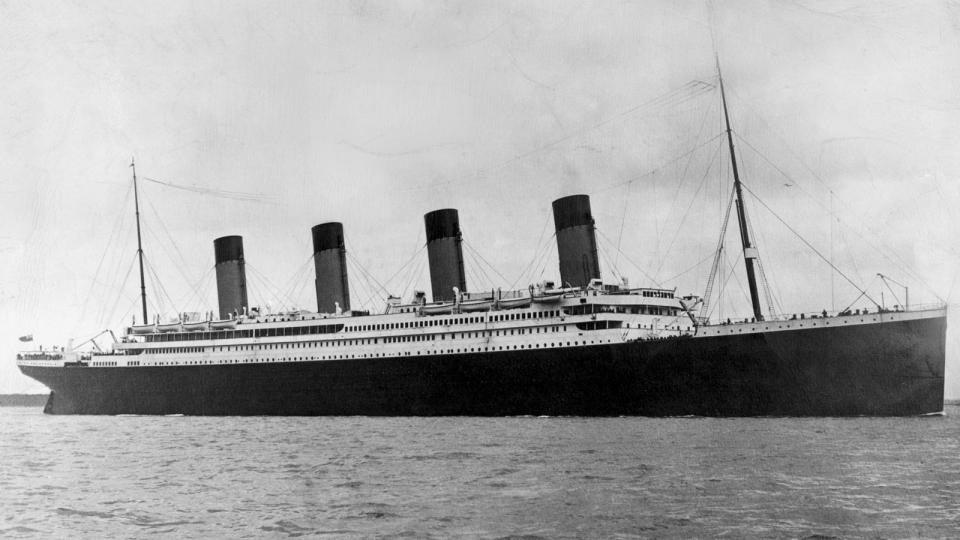


[CDN Britannica](https://cdn.britannica.com/79/4679-050-BC127236/Titanic.jpg)



O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte matando mais de 1500 pessoas.

 Os destroços do Titanic foram procurados por décadas até serem encontrados em 1985 por uma equipe liderada por Robert Ballard. Ele se encontra a 3843 m de profundidade e a 650 km ao sudeste de Terra Nova no Canadá. Até hoje o Titanic permanece como um dos navios mais famosos da história, com seus destroços atraindo várias expedições de exploração ao longo dos anos.

*Fonte:* [WikiPedia](https://pt.wikipedia.org/wiki/RMS_Titanic)

--------

#2. Analise exploratória dos dados do naufrágio

##2.1 Banco de dados
Nesta análise exploratória, utilizei o banco de dados disponibilizado pela equipe da [Udacity](https://udacity.com), que contém informações reais sobre uma parte dos passageiros à bordo do RMS Titanic no dia da tragédia.

##2.2 Organização dos dados
As informações do arquivo **titanic.data** estão organizadas nas seguintes colunas:

- Survived (Sobreviveu): 0 = Não, 1 = Sim
- Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
- Sex (Sexo): Sexo do passageiro
- Age (Idade): Idade em anos
- Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
- Parch: Quantidade de pais / crianças a bordo do Titanic
- Ticket (Bilhete): Número do bilhete de embarque
- Fare (Tarifa): Tarifa paga pelo Passageiro
- Cabin (Cabine): Número de cabine
- Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)


O objetivo deste estudo é obter algumas informações estatísticas sobre a tragédia e realizar alguns _insights_ a respeito dos tripulantes e das circunstâncias do acidente.


## 2.3 Ferramentas
Para a análise dos dados, utilizei algumas ferramentas do python bem conhecidas na área de Ciência de Dados. Para trabalhar com os dados da tabela, utilizei a biblioteca open-source [Pandas](https://pandas.pydata.org/) que facilitará muito a manipulação das informações deste banco de dados.

Também utilizei como bibliotecas auxiliares a [Numpy](https://numpy.org/) para cálculos matemáticos e a biblioteca [matplotlib](https://matplotlib.org/) para os gráficos de visualização.

Os dados estão no formato ***CSV***, e portanto utilizei a função ***read_csv*** para gerar o dataframe denominado ***tit***.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tit = pd.read_csv("titanic.data")  
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##2.4 Preparando a tabela
###2.4.1 Formato da tabela
Com a tupla ***shape*** do dataframe, podemos verificar quantas linhas e colunas temos na tabela, onde a posição 0 é referente a quantidade de linhas e a posição 1 é referente a quantidade de colunas.

In [44]:
print('A tabela contém, ' + str(tit.shape[0]) + ' linhas e ' + str(tit.shape[1]) + ' colunas.')

A tabela contém, 891 linhas e 12 colunas.


Algumas destas colunas não foi necessário para este estudo, portanto utilizei o comando ***drop()*** para removê-las 

In [45]:
tit.drop('SibSp', axis='columns', inplace=True)
tit.drop('Parch', axis='columns', inplace=True)
tit.drop('Ticket', axis='columns', inplace=True)
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C


Para melhor visualização, decidi renomear as colunas com a tradução para o português utilizando um ***dictionary*** com o nome original como chave, e o nome traduzido como valor

In [46]:
newColumns={'PassengerId':'IdPassageiro', 
            'Survived':'Sobreviveu', 
            'Pclass':'Classe', 
            'Name':'Nome',
            'Sex':'Sexo',
            'Age':'Idade',
            'Fare':'Tarifa',
            'Cabin':'Cabine',
            'Embarked':'Embarque'}

tit.rename(columns=newColumns, inplace=True)
tit

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C


###2.4.2 Tratando dos dados faltantes
Analisando os primeiros dados da tabela, podemos notar que existem informações faltantes pois aparece a sigla ***NaN***(***not a number***), que representa um valor ausente ou nulo da célula.

In [47]:
tit.head(10)

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,NaN,C


Muitas vezes cálculos envolvendo colunas numéricas com dados faltantes podem sofrer impacto. Então utilizei a função ***isna()*** do dataframe para separar somente os dados que estão faltando em cada coluna e depois a função ***sum()*** para quantifica-los.

In [48]:
print("quantidade de NaN's por coluna\n")
tit.isna().sum()


quantidade de NaN's por coluna



IdPassageiro      0
Sobreviveu        0
Classe            0
Nome              0
Sexo              0
Idade           177
Tarifa            0
Cabine          687
Embarque          2
dtype: int64

Assim podemos ver que existe um número grande de dados faltantes na coluna da idade, Cabine e Embarque.
No caso dos dados da cabine, não tem muito o que ser feito pois não são dados que podemos calcular um valor estimado por ser uma coluna quase completamente de dados nulos.
A coluna embarque é um caso diferente, apenas 2 células não temos a informação. Portanto utilizei uma tecnica que consiste em copiar para a célula faltante, a informação da celula anterior o metodo ***ffill*** na função ***fillna***. 
A função ***fillna*** preenche os dados faltantes de uma coluna com um valor especificado.

In [49]:
tit.Embarque.fillna(method='ffill', inplace=True)
print("NaNs coluna embarque:",tit.Embarque.isna().sum())

NaNs coluna embarque: 0


Para a coluna idade fiz de uma forma diferente, utilizei a função ***mean()*** para calcular a média da idades das pessoas a borbo naquele dia e preencher os dados faltantes com essa informação.

In [50]:
tit.Idade.fillna(round(tit.Idade.mean(), 2), inplace=True)
print('Idade média dos passageiros: ', round(tit.Idade.mean(), 2))
print("NaNs coluna idade:",tit.Embarque.isna().sum())

Idade média dos passageiros:  29.7
NaNs coluna idade: 0


Para melhorar a legibilidade da tabela, utilizei a propriedade ***loc*** do dataframe, para localizar e alterar os valores nas celulas das colunas 'Sobreviveu' e 'Sexo' da seguinte maneira:

Coluna Sobreviveu
- 0 => Não
- 1 => Sim

Coluna Sexo
- female => Mulher
- male => Homem

In [51]:
tit.loc[tit.Sobreviveu==0, 'Sobreviveu'] = 'Não'
tit.loc[tit.Sobreviveu==1, 'Sobreviveu'] = 'Sim'

tit.loc[tit.Sexo=='female', 'Sexo']='Mulher'
tit.loc[tit.Sexo=='male', 'Sexo']='Homem'

tit[['Sobreviveu', 'Sexo']]

,Sobreviveu,Sexo
0,Não,Homem
1,Sim,Mulher
2,Sim,Mulher
3,Sim,Mulher
4,Não,Homem
...,...,...
886,Não,Homem
887,Sim,Mulher
888,Não,Mulher
889,Sim,Homem


##3. Algumas analises
###3.3 Homens e Mulheres
Primeiramente analisei a proporção de homens e mulheres a bordo do RMS Titanic naquela viajem, com o comando ***value_counts*** na coluna Sexo.


In [108]:
hTotal = tit[tit.Sexo=='Homem'].Sexo.count()
mTotal = tit[tit.Sexo=='Mulher'].Sexo.count()

print("Qnt de homens:", hTotal)
print("Qnt de mulheres:", mTotal)

#proporcao de homens e mulheres do total
hPropTotal = hTotal/len(tit)
mPropTotal = mTotal/len(tit)

print('\nOs homens representam', str(round(hPropTotal*100, 2))+'% das pessoas a bordo')
print('as mulheres representam', str(round(mPropTotal*100, 2))+'% das pessoas a bordo')


Qnt de homens: 577
Qnt de mulheres: 314

Os homens representam 64.76% das pessoas a bordo
as mulheres representam 35.24% das pessoas a bordo


Observei que a proporção de pessoas de sexo masculino a bordo é quase 65% da tripulação, porém os relatos dizem que as mulheres e crianças tiveram prioridade nos botes salva vidas. 
Para verificar esta informação, puxei do banco de dados apenas a informação da quantidade de homens e mulheres que sobreviveram.

In [117]:
sobrevTotal = len(tit[(tit['Sobreviveu']=='Sim')])

hSobrevTotal = len(tit[(tit['Sexo']=='Homem')&(tit['Sobreviveu']=='Sim')])
mSobrevTotal = len(tit[(tit['Sexo']=='Mulher')&(tit['Sobreviveu']=='Sim')])

sobrevPropTotal = sobrevTotal/len(tit)
hSobrevPropTotal = hSobrevTotal/sobrevTotal
mSobrevPropTotal = mSobrevTotal/sobrevTotal

sb = pd.DataFrame({'% sobrev':[str(round(sobrevPropTotal*100,2))],
                   '% hSobrev':[str(round(hSobrevPropTotal*100,2))],
                   '% mSobrev':[str(round(mSobrevPropTotal*100,2))]})

print('sobreviveram ', str(round(sobrevPropTotal*100,2)) + '% das pessoas a bordo')
print('sobreviveram ', str(round(hSobrevPropTotal*100,2)) + '% dos homens a bordo')
print('sobreviveram ', str(round(mSobrevPropTotal*100,2)) + '% das mulheres a bordo')

sb

sobreviveram  38.38% das pessoas a bordo
sobreviveram  31.87% dos homens a bordo
sobreviveram  68.13% das mulheres a bordo


,% sobrev,% hSobrev,% mSobrev
0,38.38,31.87,68.13


Mesmo a população de homens sendo praticamento o dobro das mulheres, apenas 1 terço dos homens sobreviveram, o que reforça essa afirmação. Além disso haviam as crianças com idade inferior a 15 anos, e isso as colocam na lista de prioridade. Então podemos estimar proporção de homens adultos que sobreviveram excluindo pessoas do sexo masculino abaixo de 15 anos.

In [113]:
hQntAdultosSobrev = len(tit[(tit['Sexo']=='Homem')&(tit['Sobreviveu']=='Sim')&(tit['Idade']>15)])
mQntAdultosSobrev = len(tit[(tit['Sexo']=='Mulher')&(tit['Sobreviveu']=='Sim')&(tit['Idade']>15)])
cQntSobrev = len(tit[(tit['Sobreviveu']=='Sim')&(tit['Idade']<=15)])

hAdultosSobrevPropTotal = hQntAdultosSobrev/sobrevTotal
mAdultasSobrevPropTotal = mQntAdultosSobrev/sobrevTotal
cSobrevPropTotal = cQntSobrev/sobrevTotal

print('homens adultos representam', str(round(hAdultosSobrevPropTotal*100,2)) + '% do total de sobreviventes')
print('mulheres adultas representam', str(round(mAdultasSobrevPropTotal*100,2)) + '% do total de sobreviventes')
print('crianças representam', str(round(cSobrevPropTotal*100,2)) + '% do total de sobreviventes')

homens adultos representam 25.73% do total de sobreviventes
mulheres adultas representam 59.94% do total de sobreviventes
crianças representam 14.33% do total de sobreviventes


A estimativa de pessoas a bordo do RMS Titanic na viajem é de aproximadamente 2400 pessoas, onde em torno de 1500 perderam a vida. Sabendo dessas informações, validei se o pedaço do dataset que utilizei é representativo o suficiente, calculando o número de vitimas fatais baseado nas porcentagens obtidas até o momento.

In [55]:
passageirosTotal=2400
sobreviventesTotal = (sobreviventesPorc*passageirosTotal)/100
print("Qnt total de sobreviventes:", sobreviventesTotal)
print("Qnt total de vitimas:", passageirosTotal-sobreviventesTotal)

Qnt total de sobreviventes: 921.12
Qnt total de vitimas: 1478.88


O cálculo mostrou um valor muito próximo ao da estimativa oficial, 1500 para 1478. Este valor reforça a hipotese de que o dataset utilizado reflete com uma certa confiança os dados reais.
Desta forma fiz aproximação da população do navio utilizando a estimativa de total de pessoas no navio e as porcentagens encontradas.

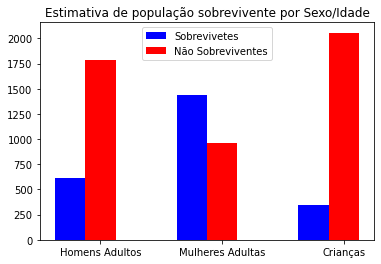

In [99]:
qntH=0
qntM=0
qntC=0

vSobreviventes = [(hAdultosSobreviventesPorc*passageirosTotal/100),
                  (mAdultosSobreviventesPorc*passageirosTotal/100),
                  (cSobreviventesPorc*passageirosTotal/100)]

vNSobreviventes = [((100-hAdultosSobreviventesPorc)*passageirosTotal/100),
                  ((100-mAdultosSobreviventesPorc)*passageirosTotal/100),
                  ((100-cSobreviventesPorc)*passageirosTotal/100)]

x1 =  np.arange(len(vSobreviventes))
x2 = [x + 0.25 for x in x1]

plt.bar(x1, vSobreviventes, width=0.25, label = 'Sobrevivetes', color = 'b')
plt.bar(x2, vNSobreviventes, width=0.25, label = 'Não Sobreviventes', color = 'r')

labels = ['Homens Adultos','Mulheres Adultas','Crianças']
plt.xticks([x + 0.25 for x in range(len(vSobreviventes))], labels)

plt.legend()

plt.title("Estimativa de população sobrevivente por Sexo/Idade")
plt.show()



#tit.groupby(by='Classe').count()

#len(tit[(tit['Sexo']=='Mulher')&(tit['Sobreviveu']=='Não')])

### 11 - Proporcionalmente, sobreviveram mais homens ou mais mulheres? Cite as proporções.

In [57]:


qntH=len(tit[tit['Sexo']=='Homem'])
qntM=len(tit[tit['Sexo']=='Mulher'])

qntHSobreviveu=len(tit[(tit['Sexo']=='Homem')&(tit['Sobreviveu']=='Sim')])
qntMSobreviveu=len(tit[(tit['Sexo']=='Mulher')&(tit['Sobreviveu']=='Sim')])

print('Sobreviveu: ' + str(math.ceil(qntMSobreviveu/qntM*100)) + '% das mulheres a bordo do Titanic')
print('Sobreviveu: ' + str(math.ceil(qntHSobreviveu/qntH*100)) + '% dos homens a bordo do Titanic')

Sobreviveu: 75% das mulheres a bordo do Titanic
Sobreviveu: 19% dos homens a bordo do Titanic


### 12 - Levando-se em consideração a idade dos passageiros, qual a idade e quantidade de pessoas com o maior número de mortos?

In [58]:
tit[tit['Sobreviveu']=='Não']['Idade'].value_counts().head(1)

29.7    125
Name: Idade, dtype: int64

### 13 - Qual a média de idade dos homens sobreviventes?

In [59]:
math.ceil(tit[(tit['Sexo']=='Homem')&(tit['Sobreviveu']=='Sim')]['Idade'].mean())

28

### 14 - Levando-se em consideração passageiros prioritários (mulheres e crianças de até 15 anos independente do sexo) qual a proporção de sobreviventes por sexo?

In [60]:
hCrianca = len(tit[(tit['Sexo']=='Homem')&(tit['Sobreviveu']=='Sim')&(tit['Idade']<=15)])
mulheres = len(tit[(tit['Sexo']=='Mulher')&(tit['Sobreviveu']=='Sim')])
print('Dos passageiros prioritarios')
print('  Homens: ' + str(math.ceil(hCrianca/(hCrianca+mulheres)*100)) + '%'  )
print('  Mulheres: ' + str(math.ceil(mulheres/(hCrianca+mulheres)*100)) + '%'  )

Dos passageiros prioritarios
  Homens: 9%
  Mulheres: 92%


### 15 - Qual a quantidade de passageiros por classe?

In [61]:
tit.groupby('Classe').count()['IdPassageiro']

Classe
1    216
2    184
3    491
Name: IdPassageiro, dtype: int64

### 16 - Qual o percentual de sobreviventes por classe?

In [62]:
tit.groupby('Classe').count()['IdPassageiro'] / tit[tit['Sobreviveu']=='Sim']['IdPassageiro'].count() * 100

Classe
1     63.157895
2     53.801170
3    143.567251
Name: IdPassageiro, dtype: float64

### 17 - Crie um dataframe que demonstre a quantidade de sobreviventes e não sobreviventes, agrupados por sexo e classe.

In [63]:
df1 = tit[tit['Sobreviveu']=='Sim'].groupby(by='Sexo').count()['Sobreviveu']
df1

Sexo
Homem     109
Mulher    233
Name: Sobreviveu, dtype: int64

### 18 - Dos homens com idade entre 24 e 30 anos quantos da classe 3 sobreviveram? Quantos da classe 2 não sobreviveram?

### 19 - Represente graficamente duas comparações que preferir e analise/descreva quais as conclusões obtidas.